In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [6]:
df = pd.read_csv('LA4Schools.csv')

In [7]:
df.head()

,StudentID,TextLevel-01-SOY,TextLevel-01-MOY,TextLevel-01-EOY,TextLevel-02-SOY,TextLevel-02-MOY,TextLevel-02-EOY,WritingVocab-01-SOY,HRSIW-01-SOY,Counting-01,...,NCCD-Funded,NumSibling,SiblingOrder,01.SES,02.SES,NumAbvYear9,NumAbvDiploma,NumProf,Year_02,At_Risk_Numeracy
0,384710734,16,18,25,25,30,32,20,49,4,...,0,3,3,104,104,2,1,2,2020,False
1,504699264,8,12,17,19,18,21,40,37,2,...,0,2,2,112,112,2,2,2,2018,False
2,332227462,8,12,18,18,23,22,6,30,2,...,0,2,2,120,109,2,0,0,2021,False
3,245262793,11,16,25,27,26,31,41,30,2,...,0,2,1,95,93,0,0,0,2021,False
4,331173944,9,12,17,21,24,26,26,32,2,...,0,1,1,98,98,2,0,0,2021,False


# Potential issues we found out in our data accessing file

- negatives in literacy scores - `Done`
- unusual high values in writing vocablury, mean is 22.05 - `Explainable`
- skewed distributions in Counting, Additition and Multiplication
- gender is not One Hot Encoded - `Done`
- Possible Redundancy in SES columns - `Leaving it for EDA - Delete either 1 while building model`
- At_Risk_Numeracy is imbalanced - `Explainable`
- reconfirm missing values - `Done`
- Wide Range in SES values
- year_02 might need to be dropped cuz we are not not doing any time related analysis - `Leaving it for EDA`
- Features on Different scales `Text Level` goes to 36, `Counting` ranges from 0-6, and `SES` ranges from 78 to 120 - `Leaving it for EDA`

In [8]:
pd.set_option('display.max_columns',None)
df.head()

,StudentID,TextLevel-01-SOY,TextLevel-01-MOY,TextLevel-01-EOY,TextLevel-02-SOY,TextLevel-02-MOY,TextLevel-02-EOY,WritingVocab-01-SOY,HRSIW-01-SOY,Counting-01,Counting-02,Place Value-01,Place Value-02,Addition and Subtraction-01,Addition and Subtraction-02,Multiplication and Division-01,Multiplication and Division-02,Kinder_Age,Gender,Disability_Non-disable,Disability_Cognitive,Disability_Physical,Disability_Sensory,Disability_SocialEmotional,NCCD-Funded,NumSibling,SiblingOrder,01.SES,02.SES,NumAbvYear9,NumAbvDiploma,NumProf,Year_02,At_Risk_Numeracy
0,384710734,16,18,25,25,30,32,20,49,4,5,2,2,2,4,2,2,5.493151,Male,1,0,0,0,0,0,3,3,104,104,2,1,2,2020,False
1,504699264,8,12,17,19,18,21,40,37,2,1,1,1,2,3,0,2,5.775342,Female,1,0,0,0,0,0,2,2,112,112,2,2,2,2018,False
2,332227462,8,12,18,18,23,22,6,30,2,1,1,2,2,1,2,1,5.923288,Male,1,0,0,0,0,0,2,2,120,109,2,0,0,2021,False
3,245262793,11,16,25,27,26,31,41,30,2,3,1,2,1,5,2,2,5.695890,Male,1,0,0,0,0,0,2,1,95,93,0,0,0,2021,False
4,331173944,9,12,17,21,24,26,26,32,2,4,2,2,2,4,1,1,5.764384,Male,1,0,0,0,0,0,1,1,98,98,2,0,0,2021,False


In [17]:
for i in df.columns:
    # print(i)
    if df[i].dtype!='object':
      if df[i].min()<0:
        print(i)

TextLevel-01-SOY
HRSIW-01-SOY


In [24]:
print('amount of values in negative\t',df['TextLevel-01-SOY'][df['TextLevel-01-SOY']<0].count())
df['TextLevel-01-SOY'][df['TextLevel-01-SOY']<0]
# This might be a mistake because a minus sign is placed before the number — and marks can never be less than zero
# will change it with the absolute values

amount of values in negative	 10


,TextLevel-01-SOY
243,-3
478,-3
536,-1
703,-1
821,-1
924,-1
969,-1
1108,-3
1588,-4
1884,-1


In [26]:
df['TextLevel-01-SOY'] = np.abs(df['TextLevel-01-SOY'])

# now we are free from any negative values

In [30]:
print('Amount of Negative values in HRSIW-01-SOY\t',df['HRSIW-01-SOY'][df['HRSIW-01-SOY']<0].count())
df['HRSIW-01-SOY'][df['HRSIW-01-SOY']<0]
# will change it with the absolute values

Amount of Negative values in HRSIW-01-SOY	 6


,HRSIW-01-SOY
590,-2
747,-2
821,-1
1212,-3
1511,-1
1886,-1


In [31]:
df['HRSIW-01-SOY'] = np.abs(df['HRSIW-01-SOY'])

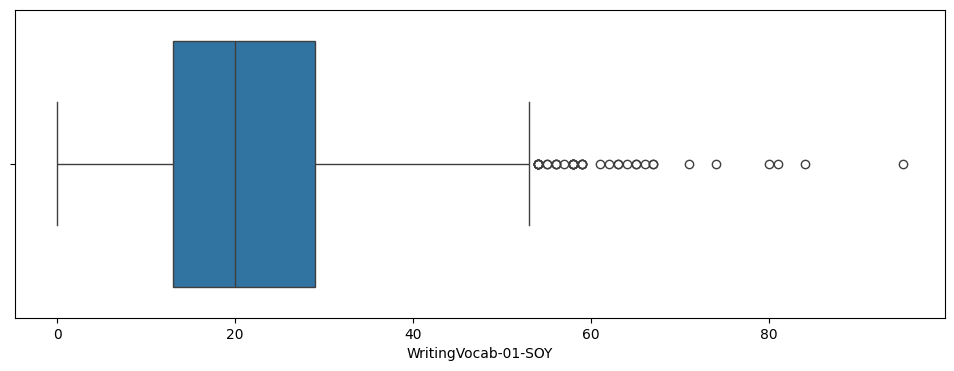

In [52]:
plt.figure(figsize=(12,4))
sns.boxplot(x=df['WritingVocab-01-SOY'])
plt.show()

In [36]:
px.box(x=df['WritingVocab-01-SOY'])
# we are encountering outliers above 53

- The values above 53 are realistic (i.e., kids with unusually high vocabulary).

- There’s no data entry error.

In [40]:
df.Gender = df.Gender.str.replace('Male','1')
df.Gender = df.Gender.str.replace('Female','0')
df.Gender = df.Gender.astype(int)

In [41]:
df.Gender.sample(5)

,Gender
1145,0
261,1
181,0
1984,1
650,0


In [48]:
df.loc[:,['01.SES', '02.SES']]

,01.SES,02.SES
0,104,104
1,112,112
2,120,109
3,95,93
4,98,98
...,...,...
1995,114,114
1996,95,93
1997,101,101
1998,117,108


In [49]:
df.loc[:,['01.SES', '02.SES']].describe()

,01.SES,02.SES
count,2000.0000,2000.000000
mean,102.9415,102.117500
std,9.3859,9.150167
min,78.0000,78.000000
25%,95.0000,95.000000
50%,101.0000,101.000000
75%,113.0000,109.000000
max,120.0000,120.000000


These two columns are likely redundant for modeling purposes

#### Could be from a national index:
Some countries or assessment frameworks (like ICSEA in Australia) assign a numerical SES score to students or schools, often ranging around a midpoint of 100:

- 100 = national average

- Values above 100 = higher SES

- Values below 100 = lower SES


<Axes: >

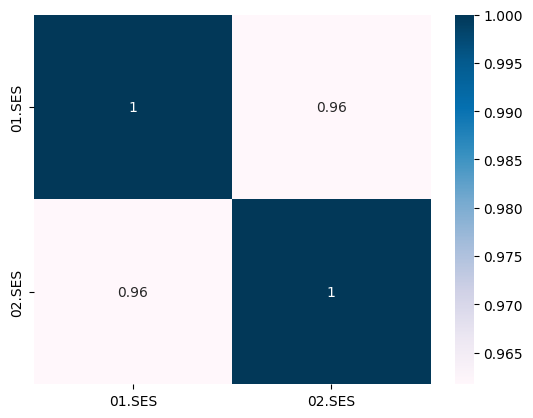

In [47]:
# Analyzing SES values

df.columns
sns.heatmap(df.loc[:,['01.SES', '02.SES']].corr(),annot=True,cmap='PuBu')

The correlation coefficient is 0.96, which shows very strong positive linear relationship
- This would lead to problem of multi-collinearity in model